<a href="https://colab.research.google.com/github/mjahidulalam/HandwrittingRecognition/blob/master/Handwritting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/Projects/Handwriting Data/A_Z Handwritten Data.csv")

In [5]:
arr = df.iloc[:,1:].to_numpy()
labels = df.iloc[:,:1].to_numpy().reshape(len(df))

data_train, data_test, labels_train, labels_test = train_test_split(arr, labels, test_size=0.20, random_state=42)

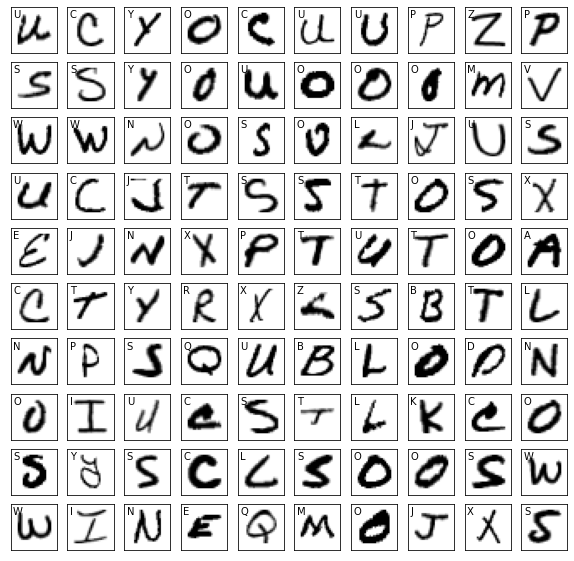

In [6]:
data_train = data_train.reshape(len(labels_train),28,28)
data_test = data_test.reshape(len(labels_test),28,28)

labels_dict = {0:"A", 1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H",8:"I",9:"J",10:"K",
               11:"L",12:"M",13:"N",14:"O",15:"P",16:"Q",17:"R",18:"S", 19:"T",20:"U",21:"V",22:"W",23:"X",24:"Y",25:"Z",}

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for row in ax:
  for col in row:
    i = np.random.randint(data_train.shape[0])
    col.imshow(data_train[i], cmap='gray_r')
    col.text(1,6,labels_dict[labels_train[i]],fontsize=10)
    col.set_xticks(())
    col.set_yticks(())

plt.show()

In [7]:
data_train = data_train/255
data_test = data_test/255

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(data_train, labels_train, epochs=10)

Epoch 1/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.2740 - accuracy: 0.9251
Epoch 2/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.1257 - accuracy: 0.9649
Epoch 3/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.0969 - accuracy: 0.9724
Epoch 4/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.0814 - accuracy: 0.9768
Epoch 5/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.0714 - accuracy: 0.9796
Epoch 6/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.0640 - accuracy: 0.9814
Epoch 7/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.0568 - accuracy: 0.9831
Epoch 8/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.0525 - accuracy: 0.9844
Epoch 9/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.0486 - accuracy: 0.9856
Epoch 10/10
9312/9312 [==============================] - 17s 2ms/step - l

In [9]:
test_loss, test_acc = model.evaluate(data_test, labels_test, verbose = 1)

2328/2328 [==============================] - 3s 1ms/step - loss: 0.0819 - accuracy: 0.9796


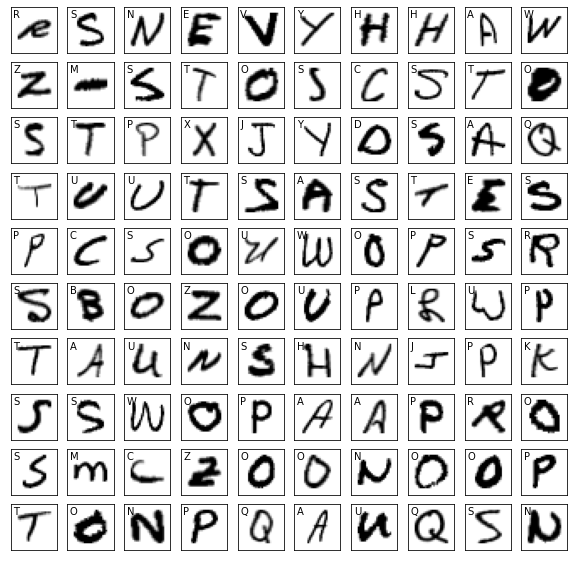

In [20]:
predictions = model.predict(data_test)

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for row in ax:
  for col in row:
    i = np.random.randint(labels_test.shape[0])
    col.imshow(data_test[i], cmap='gray_r')
    col.text(1,6,labels_dict[np.argmax(predictions[i])],fontsize=10)
    col.set_xticks(())
    col.set_yticks(())

plt.show()